### Iterative learning of single unknown A and unknown attractor

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.util import optimize_tools, load_tools, process_tools

In [2]:
x = np.array([1/2, 1/2]).reshape(1, -1)
x_dot = np.array([1.5, 2.0]) .reshape(1, -1)


"""
Groud truth: 
             x_att = [1, 1]; 
             A = A = np.array([[-2, -1], 
                              [-1, -3]])
"""

'\nGroud truth: \n             x_att = [1, 1]; \n             A = A = np.array([[-2, -1], \n                              [-1, -3]])\n'

Optimize unknown A given attractor

In [3]:
A = np.array([[-2, -1], [-1, -3]]) # known

x_att = optimize_tools.optimize_att(x, x_dot, [A])
x_dot = A @ (x-x_att).T

print('Learned attractor: ', x_att)
print('Estimated x_dot: ', x_dot.T)


Learned attractor:  [[1. 1.]]
Estimated x_dot:  [[1.5 2. ]]


Optimize unknown attractor given A

In [4]:
x_att = np.array([1, 1]).reshape(1, -1) # known
A = optimize_tools.optimize_A(x, x_dot, x_att)
x_dot = A @ (x-x_att).T

print('Learned A matrix: ', A)
print('Estimated x_dot: ', x_dot.T)


Learned A matrix:  [[[-2.27697675 -1.22302712]
  [-1.22302712 -2.27697675]]]
Estimated x_dot:  [[[1.75000193]
  [1.75000193]]]


Unknown attractor, unknown A

In [5]:
'''Load data'''
p_raw, q_raw, t_raw, dt = load_tools.load_npy()
'''Process data'''
p_in, q_in, t_in             = process_tools.pre_process(p_raw, q_raw, t_raw, opt= "savgol")
p_out, q_out                 = process_tools.compute_output(p_in, q_in, t_in)
p_init, q_init, p_att, q_att = process_tools.extract_state(p_in, q_in)
p_in, q_in, p_out, q_out     = process_tools.rollout_list(p_in, q_in, p_out, q_out)

In [6]:
x = p_in[100: ]
x_dot = p_out[100: ]
A = [-1 * np.eye(3)]
# x_att = 0.5 * np.random.rand(3,).reshape(1, -1) # Random initialization
# print("Initialized attractor:", x_att)
print("Given attractor:", p_att)

Given attractor: [ 0.56763772 -0.35704714  0.09111733]


Learned attractor:  [[ 0.56726504 -0.36747511  0.08836542]]
Learned attractor:  [[ 0.56790382 -0.36278395  0.08977407]]
Learned attractor:  [[ 0.56840982 -0.36168281  0.08852004]]
Learned attractor:  [[ 0.56920094 -0.36133139  0.0872999 ]]
Learned attractor:  [[ 0.56996707 -0.36117897  0.08639236]]
Learned attractor:  [[ 0.57059828 -0.36102731  0.08582147]]
Learned attractor:  [[ 0.57114535 -0.36087675  0.08544204]]
Learned attractor:  [[ 0.57163396 -0.36072943  0.08517813]]
Learned attractor:  [[ 0.57207888 -0.3605864   0.08498779]]
Learned attractor:  [[ 0.57248936 -0.36044787  0.08484602]]
Learned attractor:  [[ 0.57287503 -0.36031554  0.08473446]]
Learned attractor:  [[ 0.57323879 -0.36018826  0.08464556]]
Learned attractor:  [[ 0.57358456 -0.36006595  0.08457225]]
Learned attractor:  [[ 0.57391384 -0.35994777  0.08451137]]
Learned attractor:  [[ 0.57422833 -0.35983326  0.08446028]]
Learned attractor:  [[ 0.57453101 -0.35972265  0.08441566]]
Learned attractor:  [[ 0.57482209 -0.359

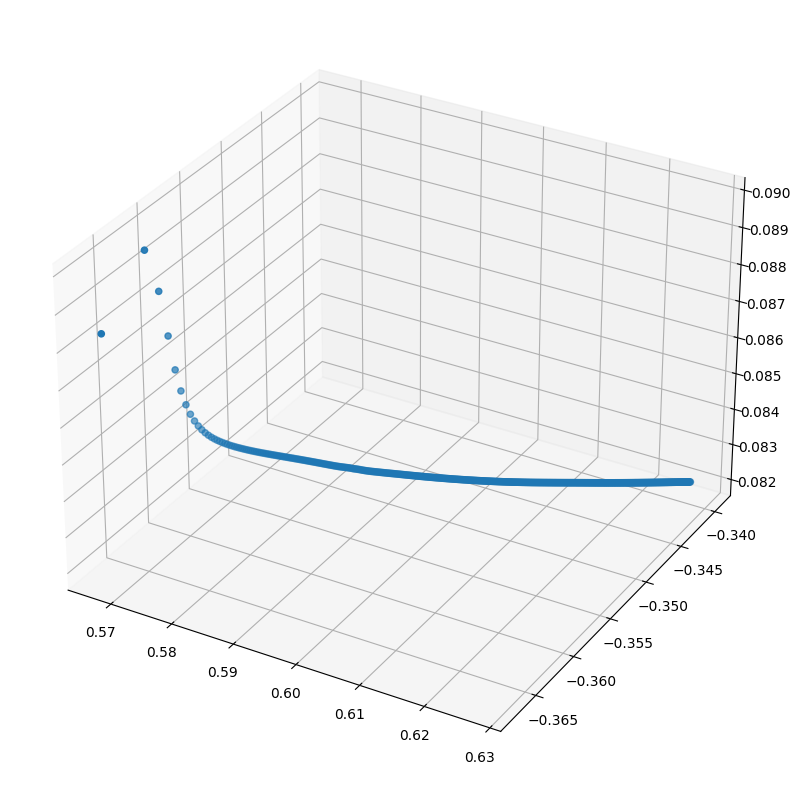

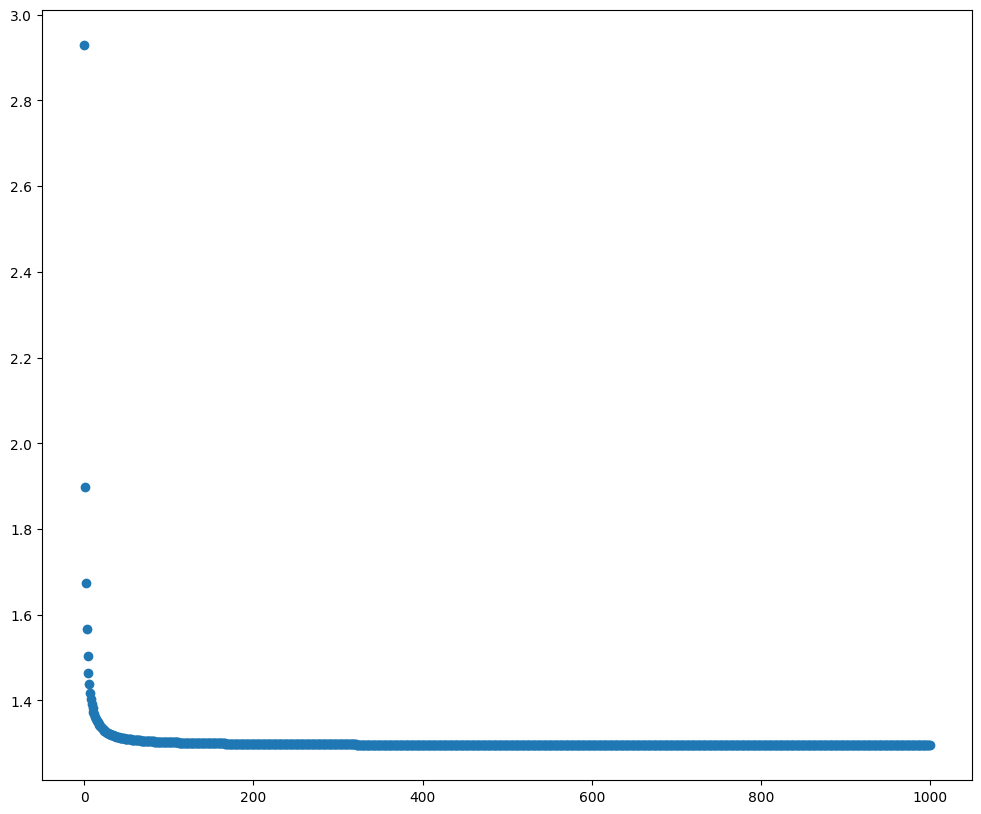

In [7]:
T = 1000
x_att_list = []
MSE_list = []
for i in range(T):
    x_att = optimize_tools.optimize_att(x, x_dot, A)
    A = optimize_tools.optimize_A(x, x_dot, x_att)

    x_dot_pred = A[0] @ (x - x_att).T
    MSE_list.append(np.sum(np.linalg.norm(x_dot_pred-x_dot.T, axis=0)))

    print('Learned attractor: ', x_att)
    x_att_list.append(x_att[0])

x_att_arr = np.array(x_att_list)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_att_arr[:, 0], x_att_arr[:, 1], x_att_arr[:, 2])
plt.show()



fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.scatter(np.arange(T), np.array(MSE_list))
plt.show()


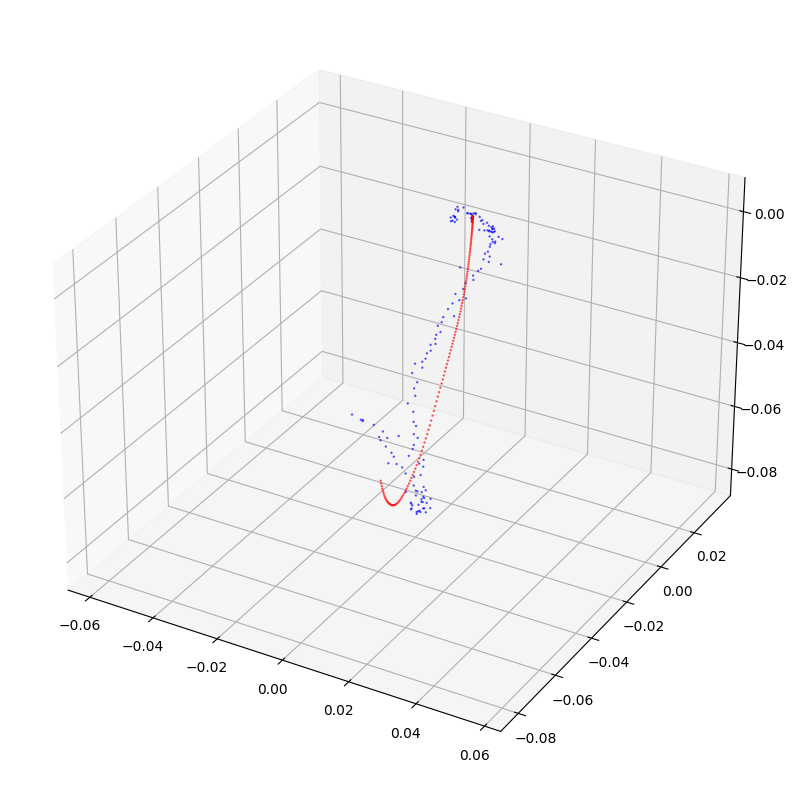

In [8]:
x_dot_pred = A[0] @ (x - x_att).T
x_dot_pred = x_dot_pred.T

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

# ax.scatter(x[:, 0], x[:, 1], color=color_mapping[:], alpha= 0.6, s=0.5)
ax.scatter(x_dot_pred[:, 0], x_dot_pred[:, 1], x_dot_pred[:, 2], color='r', alpha= 0.6, s=0.5)
ax.scatter(x_dot[:, 0], x_dot[:, 1],  x_dot[:, 2], color='b', alpha= 0.6, s=0.5)

ax.axis('equal')
plt.show()



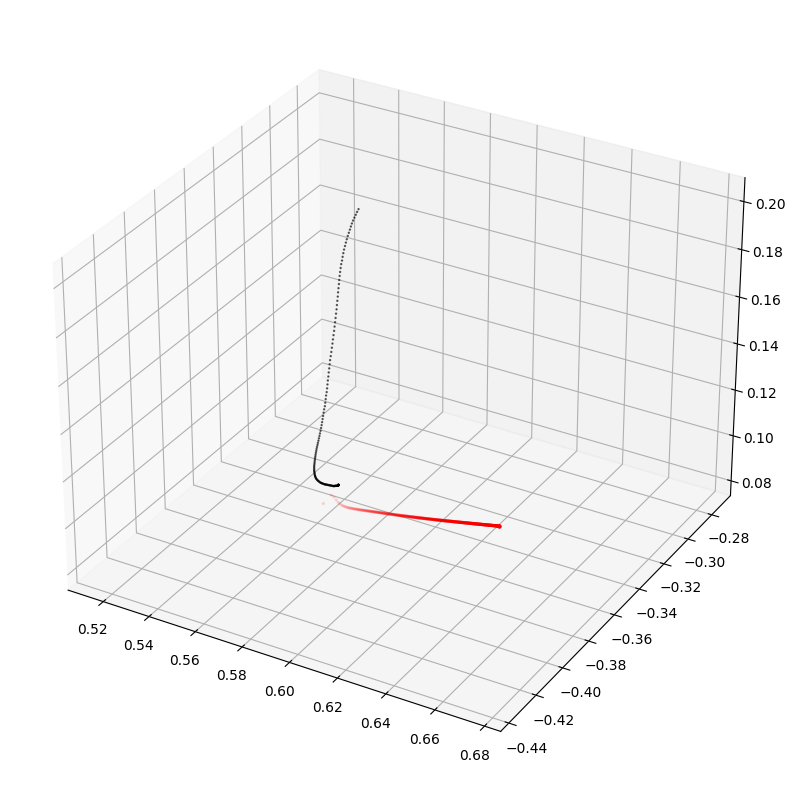

In [9]:
colors = ["r", "g", "b", "k", 'c', 'm', 'y', 'crimson', 'lime']
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], color='k', alpha= 0.6, s=0.5)
ax.scatter(x_att[:, 0], x_att[:, 1], x_att[:, 2], color='r', alpha= 1, s=5)
ax.scatter(x_att_arr[:, 0], x_att_arr[:, 1], x_att_arr[:, 2], color='r', alpha= 0.1, s=2)

ax.axis('equal')
plt.show()